# 5.4-5.5 The Electric Field

The Coulomb force, $\vec F(\vec s,t)$, at the target $t$ due to multiple sources, $\vec s$, is fundamental. We now suppose that these sources are fixed and explore this force at hypothetical targets $\vec r_t$ with positive charge. In particular, we study the **Electric Field**

$$
  \vec E(\vec r_t) = k_e \sum_{n=1}^N q_{s_n}\frac{\vec r_t - \vec r_{s_n}}{\|\vec r_t - \vec r_{s_n}\|^3}
$$

as this is just $\vec F/q_t$ we see that $\vec E$ has dimension of **force per charge**.

We will study the electric field associated with three simple arrangements of source charges; a line, a ring, and a sheet.

## A line of source with charge density $\lambda$ C/m

We first compute this field at $\vec r_t = (0,z)$ due to a line of length $L$ of charge density $\lambda\ C/m$. To get started we chop this line into $N$ identical chunks, layed, evenly spaced, along the $x$-axis between $-L/2$ and $L/2$. The centers of each chunk lie at

$$
  \vec r_{s_n} = (x_n,0), \hskip 0.25in x_n = -L/2 + dx/2 + n\,dx, \hskip 0.25in n=0,1,\ldots,N-1
$$

The width and charge of each chunk are therefore

$$
  dx = L/N \hskip 0.25in\hbox{and}\hskip 0.25in q = \lambda\,dx.
$$

We now illustrate this chunked segment of source charges (red) and a target charge (blue) at $\vec r_t = (0,z)$.

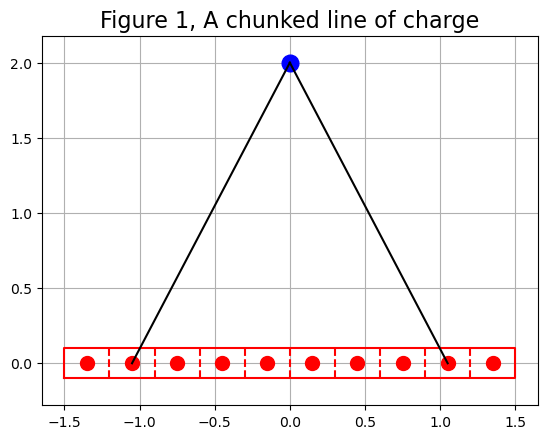

In [1]:
# a chunked line of charge
import numpy as np         # math help
import matplotlib.pyplot as plt  # graphics help

z = 2   # distance of target from source row
x_t, y_t = [0, z]   # target coordinates
plt.plot(x_t, y_t, 'bo', markersize=12)

N = 10   # number of sources
L = 3    # length of row of charge
dx = L/N  # chunk width
x_s = np.linspace(-L/2+dx/2,L/2-dx/2,N) # chunk centers
y_s = np.zeros(x_s.shape)
plt.plot(x_s, y_s, 'ro', markersize=10)  
plt.plot([-L/2, L/2, L/2, -L/2, -L/2],[-.1, -.1, .1, .1, -.1], 'r')  # full segment
for n in range(N-1):
    plt.plot([x_s[n]+dx/2, x_s[n]+dx/2],[-.1, .1],'r--')  # individual chunk boundaries

plt.plot([x_s[1],0],[0,z],'k')
plt.plot([x_s[N-2],0],[0,z],'k')

plt.title('Figure 1, A chunked line of charge',fontsize=16)
plt.grid('on')
plt.axis('equal');

The picture reveals the natural symmetry of chunk centers

$$
  x_j = -x_{N-1-j}, \hskip 0.25in j=0,1,\ldots,N/2-1.
$$

In the figure above we drawn lines from $\vec r_{s_1}$ and $\vec r_{s_8}$ to the target. Their contribution to the field
is

$$
  q_1\left(\frac{(0,z)-(x_1,0)}{(x_1^2+z^2)^{3/2}}\right) + q_8\left(\frac{(0,z)-(x_8,0)}{(x_8^2+z^2)^{3/2}}\right)
$$

which, as $x_8=-x_1$ reduces to

$$
  \frac{\lambda L}{N}\frac{(0,2z)}{(x_1^2+z^2)^{3/2}}
$$

and so $\vec E(z)=E_k(z)\vec k$ where $\vec k\equiv (0,1)$ is the vertical unit vector and so 

$$
  \boxed{E_k(z; L, N) = \frac{k_e\lambda L z}{N}\sum_{n=0}^{N-1}\frac{1}{(x_n^2+z^2)^{3/2}}
    = k_e\lambda z\sum_{n=0}^{N-1}\frac{dx}{(x_n^2+z^2)^{3/2}}}
$$

is the Electric field felt at $\vec r_t$ due to $N$ equal charges, of size $\lambda L/N$, equally spaced along the segment
$[-L/2,L/2]$. 

Now, this chunking gave us a clear way to see how to apply Coulomb's Law. 

However it leaves us with a fairly ugly sum. 

Although python can easily dispatch it we will be better served by recognizing that this sum is merely the sum of areas of rectangles and as such approaches an integral as $N$ is allowed to go to $\infty$.

Let us first explore this rectangle idea. The terms in the sum above are

$$
  \hbox{width times height, where}\hskip 0.25in \hbox{width}=dx\quad\hbox{and}\quad\hbox{height}=\frac{1}{(x_n^2+z^2)^{3/2}}
$$

We illustrate this in the bar-graph below

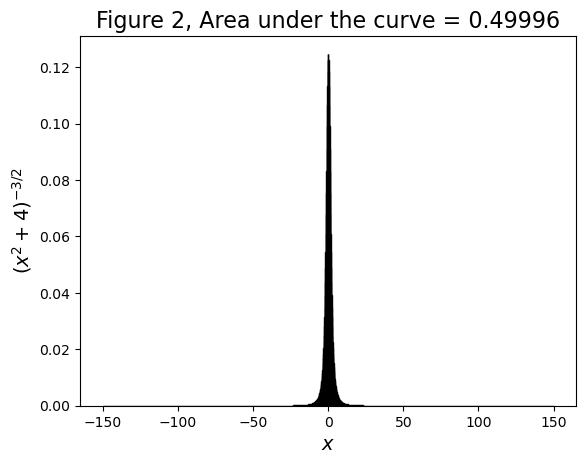

In [3]:
# area under curve
N = 2010   # number of sources
L = 300    # length of row of charge
dx = L/N
x = np.linspace(-L/2+dx/2,L/2-dx/2,N)
z = 2
h = 1/(x**2+z**2)**(3/2)
A = sum(h)*dx
plt.bar(x,h, width=dx, edgecolor = 'k')
plt.title('Figure 2, Area under the curve = ' + str(round(A,5)),fontsize=16)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$(x^2+4)^{-3/2}$', fontsize=14);

In the limit as $N\to\infty$ the chunked field, $E_k(z; L, N)$, approached the area under this curve. That is, our sum becomes the integral

$$
  E_k(z; L) = k_e\lambda z\int_{-L/2}^{L/2}\frac{dx}{(x^2+z^2)^{3/2}}
$$

We develop means for evaluating integrals in our companion course, ENGR 1122L, Introduction to Math Applications in Engineering II. Those tools will permit us to note that 

$$
  \frac{1}{(x^2+z^2)^{3/2}} \quad\hbox{is the derivative of}\hskip 0.25in \frac{x}{z^2(x^2+z^2)^{1/2}}
$$

and so the **Fundamental Theorem of Calculus** brings

$$
  E_k(z; L) = k_e\lambda z \frac{x}{z^2(x^2+z^2)^{1/2}}\bigg|_{-L/2}^{L/2} = \frac{k_e\lambda}{z}\frac{L}{((L/2)^2+z^2)^{1/2}}
$$

In order to prepare for taking $L\to\infty$ we factor this expression to

$$
  \boxed{E_k(z; L) = \frac{k_e\lambda}{z}\frac{1}{((1/4)+(z/L)^2)^{1/2}}}
$$

It follows immediately that as $L\to\infty$ this approaches

$$
  \boxed{E_k(z) = \frac{2k_e\lambda}{z}}
$$

This is our first **big result**, the strength of the Electric Field from a line of sources decays like one over your distance to the line.

$$
  \boxed{\vec E_{line}(z) = (0,2k_e\lambda/z)}
$$

We now return to python to help us visualize how a finite line of charges approaches this nice clean limit.

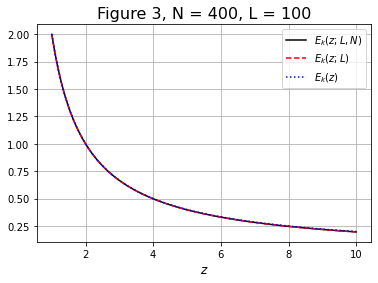

In [10]:
# line charges, discrete, finite, and continuous
N = 400   # number of sources
L = 100    # length of line of charge
dx = L/N
x = np.linspace(-L/2+dx/2,L/2-dx/2,N)

z = np.linspace(1,10,100)   # 100 z values
Ek = np.zeros(100,)         # place holders for Ek
EkExact = np.zeros(100,)    # place holder for integrated Ek (N -> oo)
ELim = np.zeros(100,)       # place holder for integrated Ek as L -> oo

plt.close('all')

for zinc in range(100):  # run through the z values
    for j in range(N):  # find the k (vertical) component of the E-field
        Ek[zinc] = Ek[zinc] + 1./(x[j]**2+z[zinc]**2)**(3/2)

    Ek[zinc] = L*z[zinc]*Ek[zinc]/N
    EkExact[zinc] = 1./(z[zinc]*np.sqrt((z[zinc]/L)**2+0.25))
    ELim[zinc] = 2/z[zinc]

plt.plot(z,Ek,'k')
plt.plot(z,EkExact,'r--')
plt.plot(z,ELim,'b:')
plt.legend(['$E_k(z; L, N)$','$E_k(z; L)$','$E_k(z)$'])
plt.grid('on')
plt.xlabel('$z$',fontsize=12)
plt.title('Figure 3, N = {}, L = {}'.format(N,L),fontsize=16);

## A ring of source charges of density  $\sigma\ C/m^2$

We consider a flat annular ring of (center) radius $R$ and width $dR$ covered with charge of density $\sigma\ C/m^2$. As above we chunk it into $N$ sectors centered at

$$
  x_n = R\cos(n\theta), \hskip 0.25in y_n = R\sin(n\theta), \hskip 0.25in\theta = 2\pi/N, \hskip 0.25in n=0,1,\ldots,N-1
$$

As such, each chunk has area $R\,dR\theta$ and charge
$$
  q_j = \sigma R\,dR\theta = \sigma 2\pi R\,dR/ N
$$

We illustrate this in the figure below. We have now made the jump to 3D!

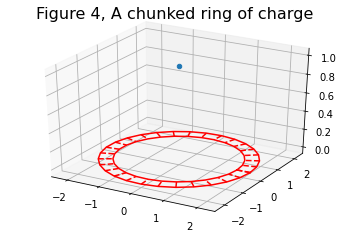

In [8]:
# chunked ring
ax = plt.axes(projection="3d")
t = np.linspace(0,2*np.pi,30)
R = 2
x = R*np.cos(t)
y = R*np.sin(t)
z = np.zeros(x.shape)
ax.plot3D(1.1*x, 1.1*y, z, 'r')   # outer circle
ax.plot3D(0.9*x, 0.9*y, z, 'r')   # inner circle
for n in range(30):
    ax.plot3D([1.1*x[n], 0.9*x[n]],[1.1*y[n],0.9*y[n]], [0, 0], 'r--')  # chunk edges

ax.scatter3D(0, 0, 1)   # blue target
plt.title('Figure 4, A chunked ring of charge',fontsize=16);

Applying Coulomb's Law at each chunk we see that the Electric field at the target $(0,0,z)$ is again purely vertical, with

$$
  E_k(z; R, N) = \frac{k_e\sigma 2\pi z R dR}{N}\sum_{j=0}^{N-1}\frac{1}{(x_j^2+y_j^2+z^2)^{3/2}} 
$$

As $x_j^2+y_j^2=R^2$ we see that our terms do not depend on $j$ and so the sum is simply

$$
  \boxed{E_k(z; R) = \frac{k_e\sigma 2\pi z R dR}{(R^2+z^2)^{3/2}}} 
$$

## A sheet of source charges

We next add up (integrate) this ring field over rings of increasing radius to create a disk of charge as illustrated below.

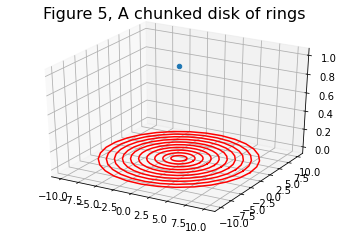

In [5]:
# disk of rings
ax = plt.axes(projection="3d")
t = np.linspace(0,2*np.pi,30)
R = np.linspace(1,10,10)

for r in R:
    x = r*np.cos(t)
    y = r*np.sin(t)
    z = np.zeros(x.shape)
    ax.plot3D(x, y, z, 'r')   # outer circle

ax.scatter3D(0, 0, 1)   # blue target
plt.title('Figure 5, A chunked disk of rings',fontsize=16);

If we then let the siz of the disk approach infinity we arrive at the Sheet Field, with vertical component

$$
  E_k(z) = \int_0^\infty E_k(z; R) = k_e\sigma 2\pi z\int_0^\infty \frac{R\,dR}{(R^2+z^2)^{3/2}}
$$

Our interest is in discerning how this varies with $z$, and so we pull out a factor of $z^2$,

$$
  E_k(z) =  \frac{k_e\sigma 2\pi}{z^2}\int_0^\infty \frac{R\,dR}{((R/z)^2+1)^{3/2}}
$$

and then make the change of variable

$$
  u = R/z, \hskip 0.25in du = dR/z
$$

and so

$$
  E_k(z) =  k_e\sigma 2\pi\int_0^\infty \frac{u\,du}{(u^2+1)^{3/2}}
$$

in fact has **no dependence** on $z$, i.e., the field strength is the same no matter how far you are from the sheet of charge.

It remains only to calculate that final integral. Let us first graph the integrand and estimate the area under the curve.

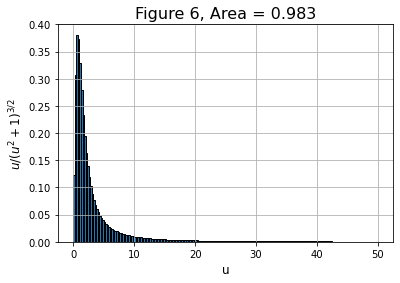

In [6]:
# area under curve
L = 50
N = 200
du = L/N     # width
u = np.linspace(du/2,L-du/2,N)
f = u/(u**2+1)**(3/2)  # height
plt.bar(u,f,width=du,edgecolor='k')
plt.grid('on')
Ival = sum(f)*du  # add up width*height for each rectangle
plt.xlabel('u',fontsize=12)
plt.ylabel('$u/(u^2+1)^{3/2}$',fontsize=12)
plt.title('Figure 6, Area = ' + str(round(Ival,3)), fontsize=16);

As you enlarge and refine the region of integration you will find python taking you to a value of 1. Let us see if we can get there via calculus. The integrand "looks" trigonometric and $u$ travels from $0$ to $\infty$. Hence, we try

$$
  u = \tan(\theta), \hskip 0.25in du = \frac{d\theta}{\cos^2(\theta)}
$$

in

$$
  I = \int_0^\infty \frac{u\,du}{(u^2+1)^{3/2}}
   = \int_0^{\pi/2} \frac{\tan(\theta)\,d\theta}{\cos^2(\theta)(\tan(\theta)^2+1)^{3/2}}
   = \int_0^{\pi/2} \sin(\theta)\,d\theta = \cos(0) - \cos(\pi/2) = 1
$$

as suspected.

This then gives our final result: the electric field of a planar sheet of $\sigma$ Coulombs per square meter of charge is

$$
  \boxed{\vec E_{sheet} = (0,0,2\pi k_e\sigma)}
$$

For our final trick we will stack two sheets of opposite charge

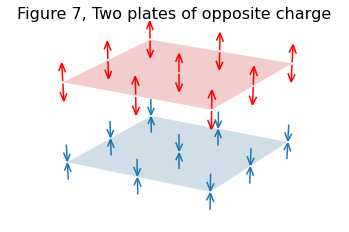

In [7]:
# parallel sheets
ax = plt.axes(projection="3d")

xx, yy = np.meshgrid(range(0,10,4), range(0,10,4))
z = np.zeros(xx.shape)
ax.plot_surface(xx, yy, z, alpha=0.2)

u = np.zeros(xx.shape)
v = np.zeros(xx.shape)
w = np.ones(xx.shape)

ax.quiver3D(xx, yy, z+1.6, u, v, -w, length=1.5, arrow_length_ratio=0.5) 
ax.quiver3D(xx, yy, z-1.6, u, v, w, length=1.5, arrow_length_ratio=0.5) 

z = 7*np.ones(xx.shape)
ax.plot_surface(xx, yy, z, color = 'r', alpha=0.2)

ax.quiver3D(xx, yy, z+0.1, u, v, w, color = 'r',  length=1.5, arrow_length_ratio=0.5) 
ax.quiver3D(xx, yy, z-0.1, u, v, -w, color = 'r', length=1.5, arrow_length_ratio=0.5)

ax.set_zlim([-1,8])
plt.axis('off')
plt.title('Figure 7, Two plates of opposite charge',fontsize=16);

## Homework 2. Due Monday at Midnight at Blackboard.

Create a Jupyter Notebook that solves, and plots the E-fields, for exercises 83, 84 and 89 from Chapter 5 of our text.

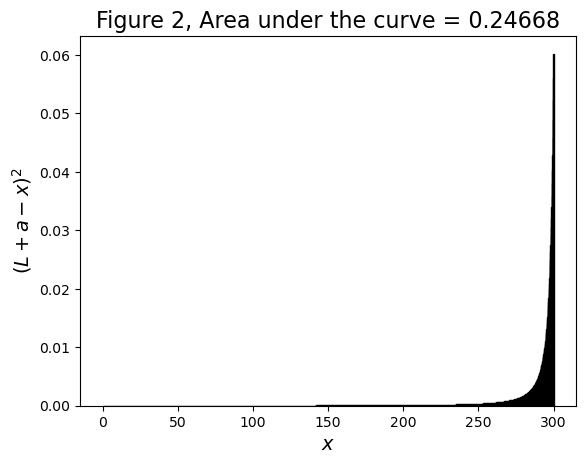

In [6]:
# area under curve

import numpy as np
import matplotlib.pyplot as plt

N = 2000   # number of sources
L = 300    # length of row of charge
dx = L/N
x = np.linspace(dx/2,L-dx/2,N)
a = 4
h = 1/(L+a-x)**2
A = sum(h)*dx
plt.bar(x,h, width=dx, edgecolor = 'k')
plt.title('Figure 2, Area under the curve = ' + str(round(A,5)),fontsize=16)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$(L+a-x)^2$', fontsize=14);